# CAB420 Assignment 1A Question 2: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 2. It simply implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [2]:
import pandas
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
train = pandas.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q2\training.csv')
val = pandas.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q2\validation.csv')
test = pandas.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q2\testing.csv')

# pull out X and y data, convert to numpy
X_train = train.iloc[:,1:].to_numpy()
Y_train = train.iloc[:,0].to_numpy()
X_val = val.iloc[:,1:].to_numpy()
Y_val = val.iloc[:,0].to_numpy()
X_test = test.iloc[:,1:].to_numpy()
Y_test = test.iloc[:,0].to_numpy()

{'whiskers': [<matplotlib.lines.Line2D at 0x26088182910>,
 'caps': [<matplotlib.lines.Line2D at 0x260881980d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26088181d50>,
 'medians': [<matplotlib.lines.Line2D at 0x26088199890>,
 'fliers': [<matplotlib.lines.Line2D at 0x2608819a290>,
 'means': []}

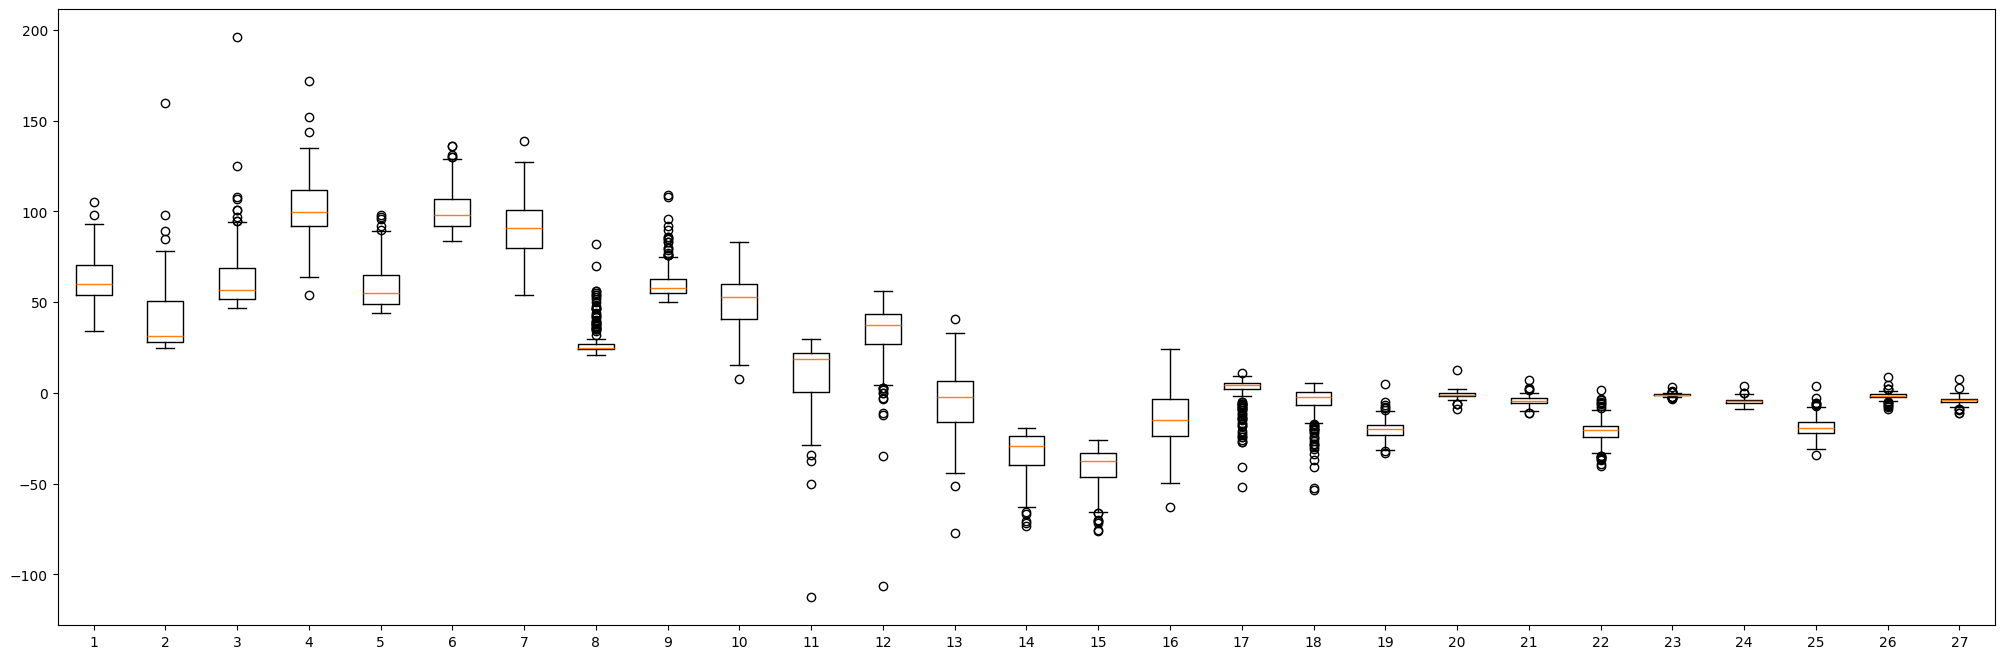

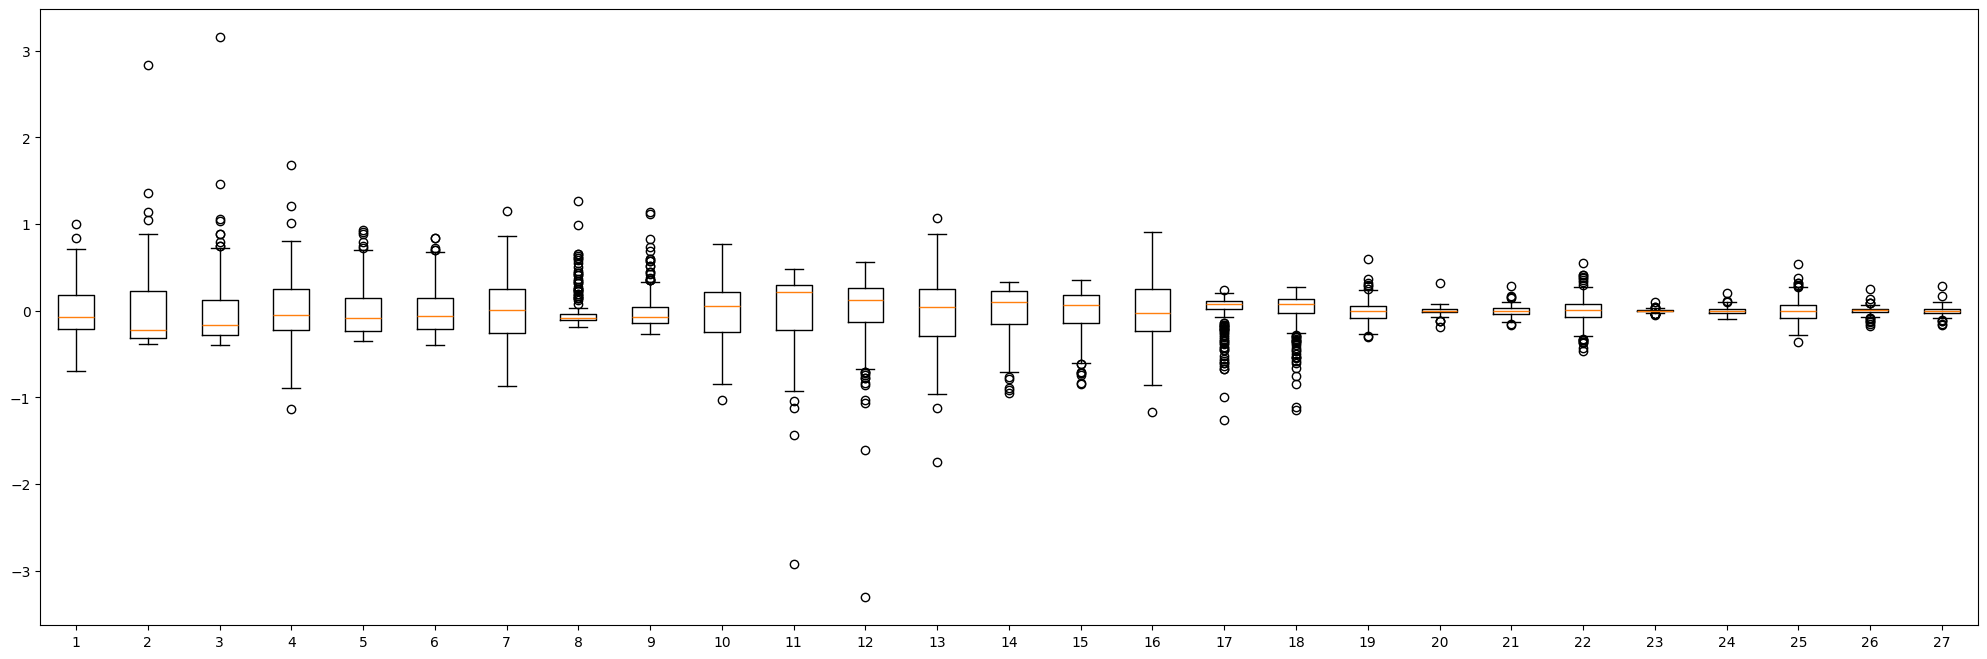

In [4]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing

# plot the data on a box plot before standardisation
plt.figure(figsize=[25, 8])
plt.boxplot(X_train)

mu = np.mean(X_train, axis=0)
sigma = np.std(X_train)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_val = (X_val - mu) / sigma
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train)

In [5]:
# Q2 asks you to use a grid search for each model. You are to evaluate the models on the validation set, and train on the train
# set. If you wish to use sklearn's GridSearchCV, you will need to setup a PredefinedSplit to pass into this. An appropraite
# PredefinedSplit object is created below.
X_train_and_val = np.vstack((X_train, X_val))
Y_train_and_val = np.hstack((Y_train, Y_val))
mask = np.zeros(len(Y_train_and_val))
mask[0:len(Y_train)] = -1
train_val_split = PredefinedSplit(mask)

In [6]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)))
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)))
    print(classification_report(Y_test, model.predict(X_test)))


Best CKNN Parameters:
Best K: 1
Best Distance Metric: euclidean
Best Weighting Scheme: uniform
Best Validation Accuracy: 0.8720

=== FINAL EVALUATION ON TEST SET ===
              precision    recall  f1-score   support

          d        0.85      0.89      0.87        53
          h        0.67      0.93      0.78        15
          o        0.96      0.71      0.81        31
          s        0.89      0.89      0.89        62

    accuracy                           0.86       161
   macro avg       0.84      0.85      0.84       161
weighted avg       0.87      0.86      0.86       161



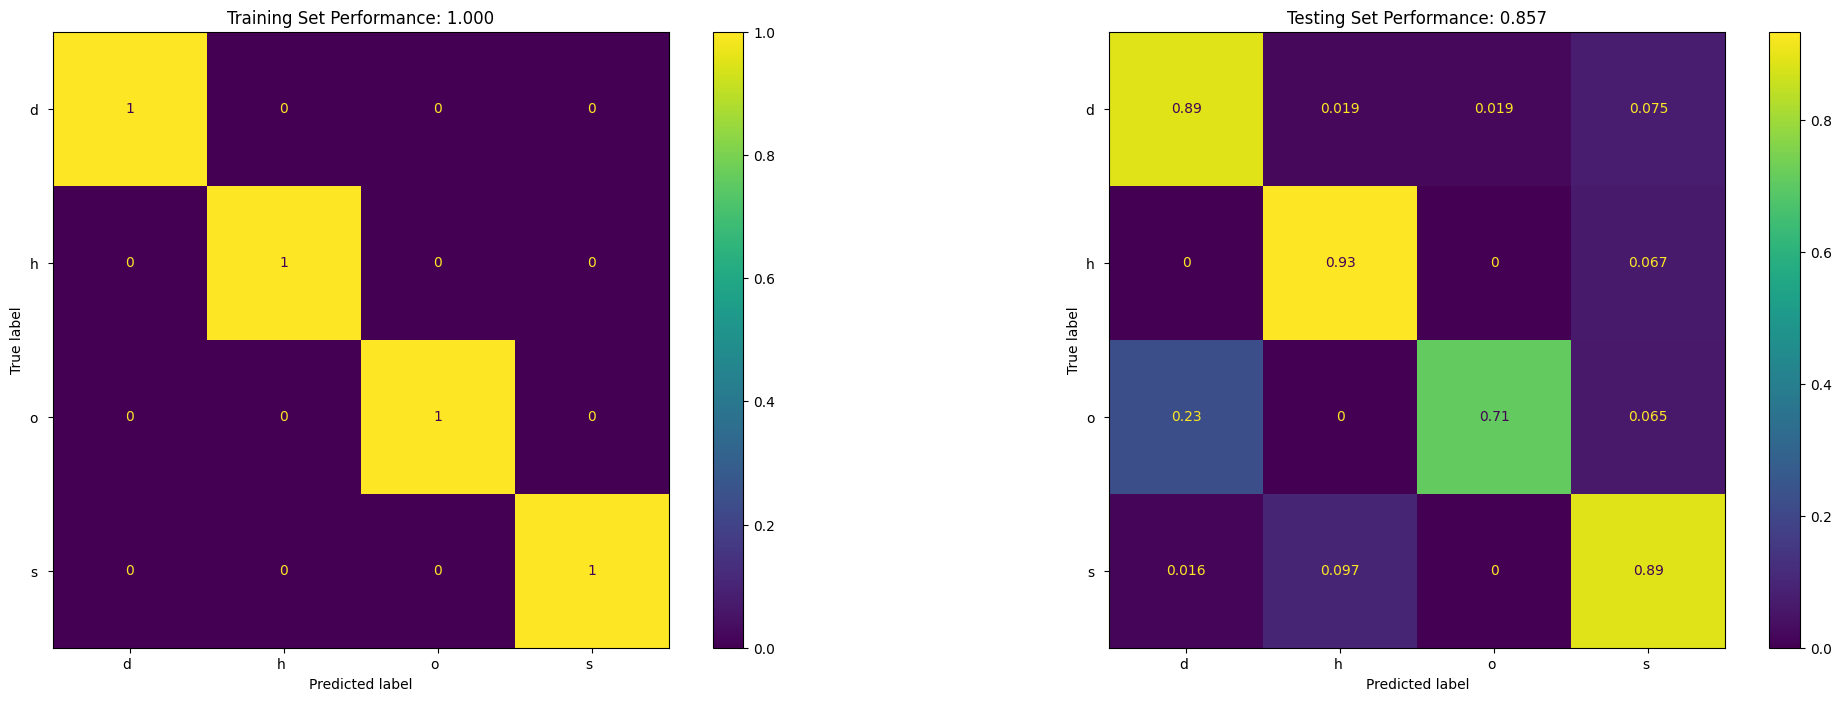

In [7]:
# Train your CKNN. You should consider the following parameters at least:
#  - K
#  - Distance Metric
#  - Weighting Scheme
# Please note, you'd don't need to find the "perfect" parameters. The grid search does not need to consider every possible value,
# and can be quite coarse to avoid long run-times. You may also wish to conduct a rough search first, and then a refined search, 
# though this is not required.

# Define parameter grid
values_of_k = [1, 2, 4, 8, 16, 32, 64, 128]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
weightings = ['uniform', 'distance']

# Variables to track the best parameters
best_accuracy = 0
best_params = {}
best_cknn = None

for k in values_of_k:
    for metric in distance_metrics:
        for weight in weightings:
            # Create and train model
            cknn = KNeighborsClassifier(n_neighbors=k, 
                                      metric=metric, 
                                      weights=weight)
            cknn.fit(X_train, Y_train)
            
            # Evaluate on validation set
            val_pred = cknn.predict(X_val)
            current_accuracy = accuracy_score(Y_val, val_pred)
            
            # Update best parameters if current model is better
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_params = {
                    'n_neighbors': k,
                    'metric': metric,
                    'weights': weight
                }
                best_cknn = cknn

# After all combinations have been tried
print("\nBest CKNN Parameters:")
print(f"Best K: {best_params['n_neighbors']}")
print(f"Best Distance Metric: {best_params['metric']}")
print(f"Best Weighting Scheme: {best_params['weights']}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on test set
print("\n=== FINAL EVALUATION ON TEST SET ===")
eval_model(best_cknn, X_train, Y_train, X_test, Y_test)


Best parameters for SVM:  {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best score for SVM:  0.8536585365853658
SVM Evaluation
              precision    recall  f1-score   support

          d        0.88      0.88      0.88        52
          h        0.88      0.91      0.89        23
          o        0.69      0.73      0.71        15
          s        0.96      0.93      0.95        74

    accuracy                           0.90       164
   macro avg       0.85      0.87      0.86       164
weighted avg       0.90      0.90      0.90       164



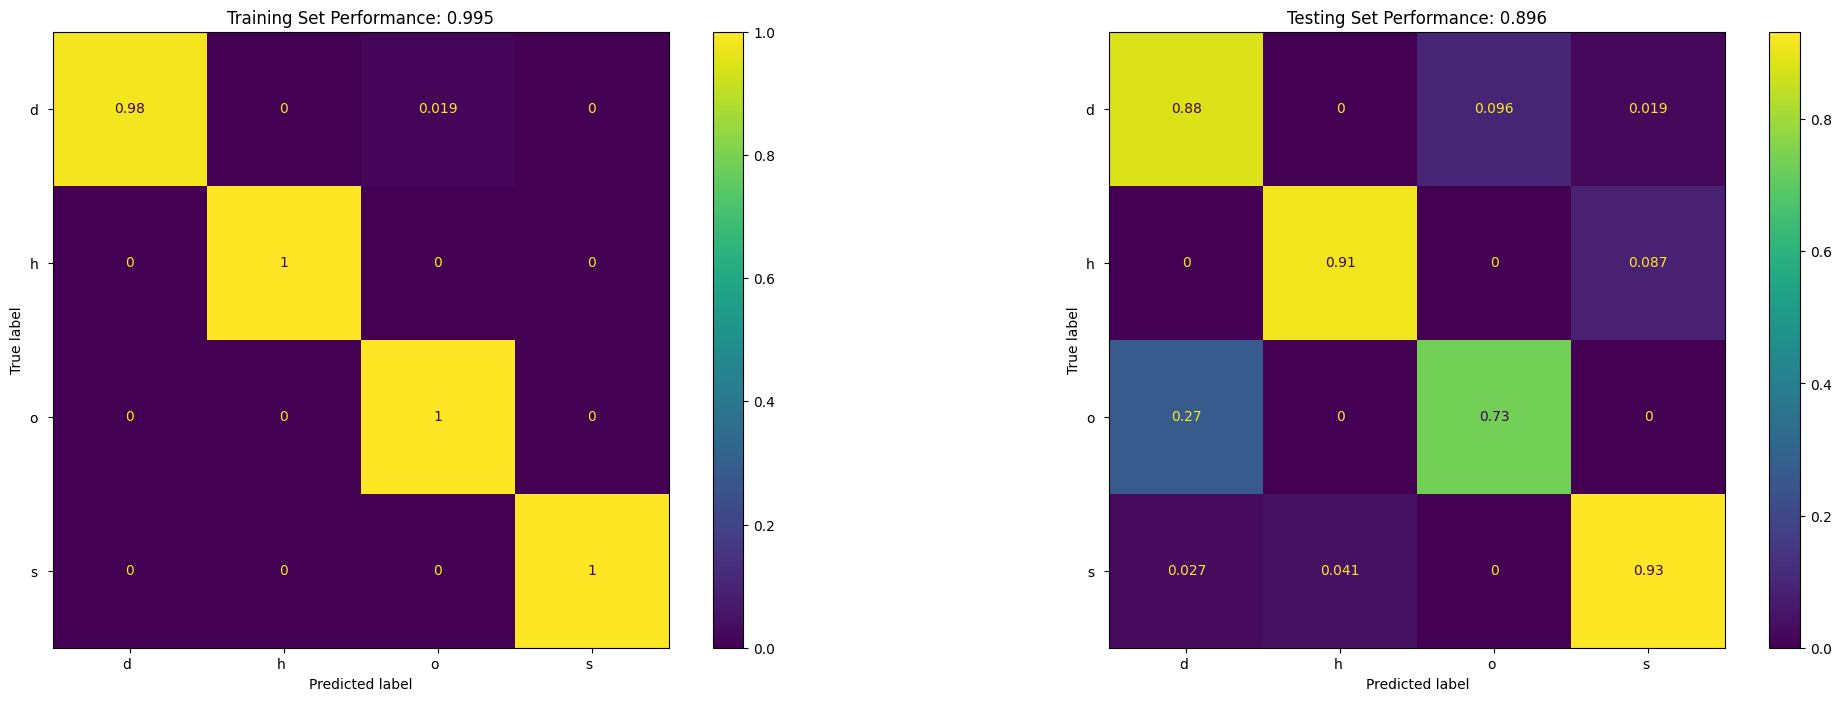

In [8]:
# Train your SVM. You should consider the following parameters at least:
#  - C
#  - Kernel Type
#  - Kernel Parameters
#  - Ensemble scheme (i.e. "one vs one" or "one vs all")
# Please note, you'd don't need to find the "perfect" parameters. The grid search does not need to consider every possible value,
# and can be quite coarse to avoid long run-times. You may also wish to conduct a rough search first, and then a refined search, 
# though this is not required.

# define a coarse grid for SVM including ensemble schemes
param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear'], 'decision_function_shape': ['ovo', 'ovr']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf'], 'decision_function_shape': ['ovo', 'ovr']},
    {'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5], 'kernel': ['poly'], 'decision_function_shape': ['ovo', 'ovr']},
]

# initialise the SVM model
svm = SVC(class_weight='balanced')

# perform GridSearchCV using PredifinedSplit
svm_grid_search = GridSearchCV(svm, param_grid, cv=train_val_split, n_jobs=-1)
svm_grid_search.fit(X_train_and_val, Y_train_and_val)

# print the best parameters
print("Best parameters for SVM: ", svm_grid_search.best_params_)
print("Best score for SVM: ", svm_grid_search.best_score_)

print("SVM Evaluation")
eval_model(svm_grid_search.best_estimator_, X_train, Y_train, X_val, Y_val)


Best Parameters:
Depth: 1
Number of estimators: 100
Validation Accuracy: 0.8354
RF Evaluation:
              precision    recall  f1-score   support

          d        0.86      0.71      0.78        52
          h        0.89      0.74      0.81        23
          o        0.59      0.67      0.62        15
          s        0.82      0.95      0.88        74

    accuracy                           0.82       164
   macro avg       0.79      0.77      0.77       164
weighted avg       0.82      0.82      0.81       164



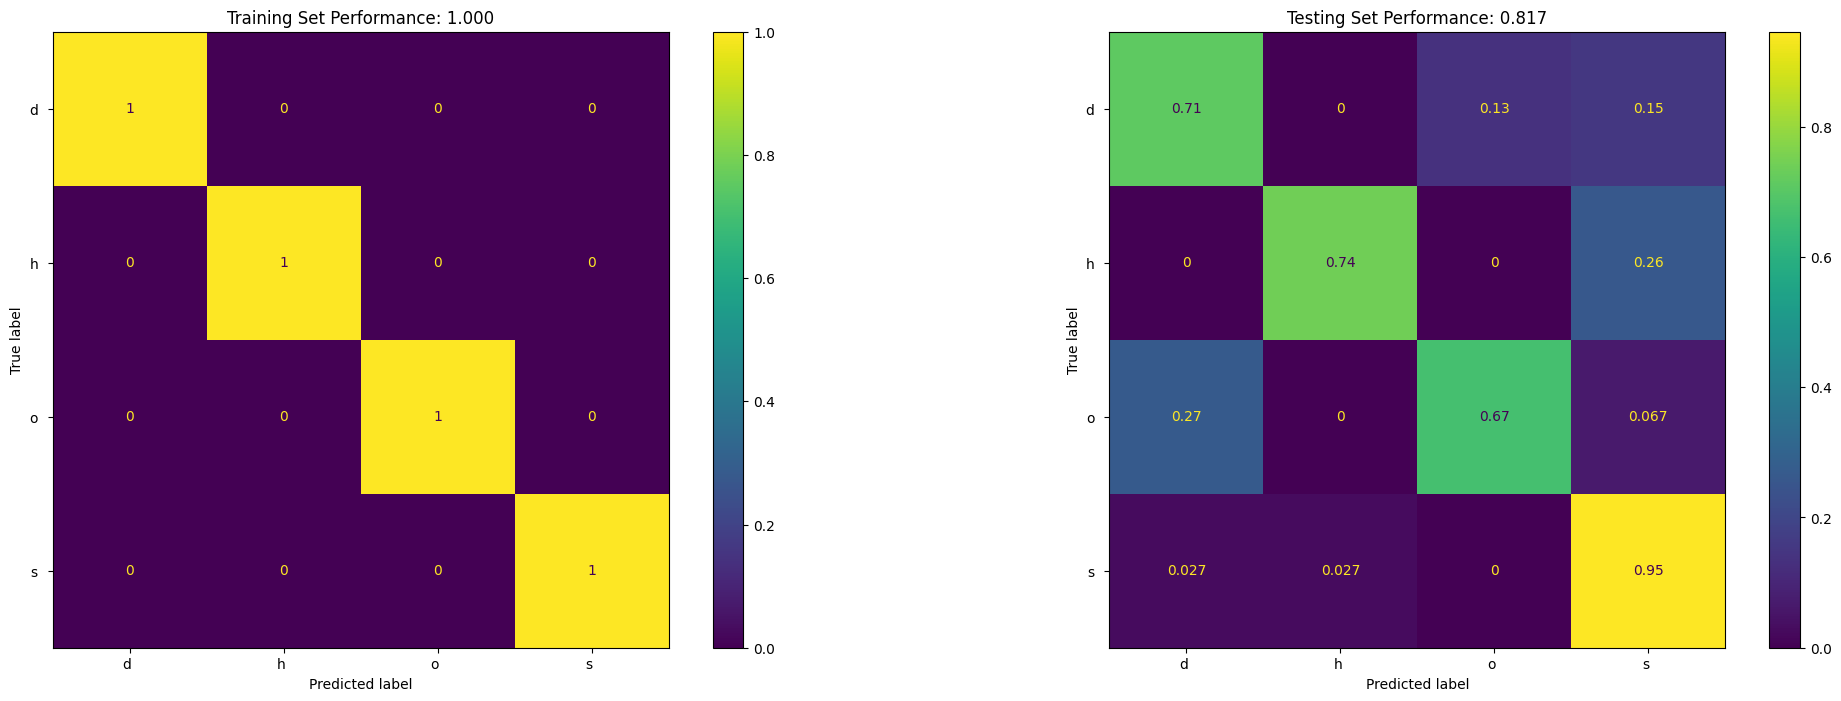

In [9]:
# Train your RF. You should consider the following parameters at least:
#  - Tree depth
#  - Number of estimators
# Please note, you'd don't need to find the "perfect" parameters. The grid search does not need to consider every possible value,
# and can be quite coarse to avoid long run-times. You may also wish to conduct a rough search first, and then a refined search, 
# though this is not required.

# Initialize variables to track the best parameters
best_accuracy = 0
best_depth = None
best_n_estimators = None

depth_options = [1, 2, 4, 8, 16]
n_estimators_options = [50, 100, 200, 300]

for depth in depth_options:
    for n in n_estimators_options:
        # Train model with current parameters
        rf = RandomForestClassifier(max_depth=depth, 
                                  n_estimators=n, 
                                  random_state=0)
        rf.fit(X_train, Y_train)
        
        # Evaluate on validation set (use X_test if you don't have separate validation data)
        current_accuracy = accuracy_score(Y_val, rf.predict(X_val))
        
        # Update best parameters if current model is better
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_depth = depth
            best_n_estimators = n

# After the loop completes, print the best parameters
print(f"\nBest Parameters:")
print(f"Depth: {best_depth}")
print(f"Number of estimators: {best_n_estimators}")
print(f"Validation Accuracy: {best_accuracy:.4f}")

print("RF Evaluation:")
eval_model(rf, X_train, Y_train, X_val, Y_val)

In [10]:
# Evaluate the three methods. This should consider appropriate performance measures for the classifiers, such as F1, and 
# visualisations of performance (i.e. confusion matrices) that demonstrate any difference in perfomance between the models.

In [11]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the hyper-parameters for each of your models, and how these may be influenced by any data 
#   characteristics, and any effect you may see from the selected hyper-parameters (ie. if you have found a small value for a 
#   hyper parameter, what effect will this have on the model compared to a large value?) 
# - an evaluation and comparison of three models, which should highlight any differences observed between the models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions.
# Note that figures and tables are not included in the page limits.
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT